### Analysing the UCSD Data set https://github.com/UCSD-AI4H/COVID-CT

In [7]:
#Imports packages
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
pd.options.mode.chained_assignment = None 

In [13]:
#Import the Excel File Information into a pandas dataset 
ucsd = pd.read_excel('COVID-CT-MetaInfo.xlsx',sheet_name = 'positive_captions')
ucsd.columns = ['Image','Patient','Source','Caption']
ucsd.insert(4,'Label','Nan')
caption = ucsd['Caption']
  
# Convert labels into split lists to make it easier to iterate 
for i in range(len(caption)):
    caption[i] = str(caption[i])
    caption[i] = caption[i].strip("[]").split(' ')

print(caption)

consolidation = 0
ground_glass = 0
effusion = 0 

for i in range(len(caption)):
    for j in range(len(caption[i])):
        if caption[i][j] == 'consolidation' or caption[i][j] == 'consolidations' or caption[i][j] == 'consolidation,' or caption[i][j] == '(consolidation)':
            consolidation +=1
            ucsd['Label'][i] = 'consolidation'
        if caption[i][j] =='ground-glass' or caption[i][j] == 'glass' or caption[i][j] == 'glass,' or caption[i][j] == '"ground-glass"': 
            ground_glass +=1
            ucsd['Label'][i] = 'ground glass'

        if caption[i][j] == 'effusion' or  caption[i][j] == "effusion.'" or caption[i][j] == 'effusion.':
            effusion+=1
            ucsd['Label'][i] = 'effusion'
print('\n','Consolidation',consolidation,'Ground Glass Opacity',ground_glass, 'Effusion',effusion)

0      ['Figure, 1., Chest, radiographs, of, patient,...
1      ['Figure, 1., Chest, radiographs, of, patient,...
2      ['Figure, 1., Chest, radiographs, of, patient,...
3      ['Figure, 1., A, 50-year-old, man, with, 2019,...
4      ['Figure, 1., A, 50-year-old, man, with, 2019,...
                             ...                        
344    [Computed, tomography, of, the, lungs, reveale...
345    [Computed, tomography, of, the, lungs, reveale...
346    [Computed, tomography, of, the, lungs, reveale...
347    [Computed, tomography, of, the, lungs, reveale...
348             [NTM,, nontuberculous, mycobacterium., ]
Name: Caption, Length: 349, dtype: object

 Consolidation 98 Ground Glass Opacity 219 Effusion 27


In [14]:
# after checking sheet saw that \n",
consolidaiton = 110
ground_glass = 239 
effusion = 27

# data frame with results 
ucsd_results = pd.DataFrame({'Consolidation':[110], 'Ground Glass':[239],'Effusion':[27]})
ucsd_results

,Consolidation,Ground Glass,Effusion
0,110,239,27


In [15]:
ucsd

,Image,Patient,Source,Caption,Label
0,2020.01.24.919183-p27-133.png,Patient 1,NaN,"['Figure, 1., Chest, radiographs, of, patient,...",consolidation
1,2020.01.24.919183-p27-134.png,Patient 1,NaN,"['Figure, 1., Chest, radiographs, of, patient,...",consolidation
2,2020.01.24.919183-p27-135.png,Patient 1,NaN,"['Figure, 1., Chest, radiographs, of, patient,...",consolidation
3,2020.02.10.20021584-p6-52%0.png,Patient 2,NaN,"['Figure, 1., A, 50-year-old, man, with, 2019,...",ground glass
4,2020.02.10.20021584-p6-52%1.png,Patient 2,NaN,"['Figure, 1., A, 50-year-old, man, with, 2019,...",ground glass
...,...,...,...,...,...
344,Talaromyces-marneffei-infection-relapse-presen...,Patient 216,10.1016/j.ijid.2020.02.037,"[Computed, tomography, of, the, lungs, reveale...",Nan
345,Talaromyces-marneffei-infection-relapse-presen...,Patient 216,10.1016/j.ijid.2020.02.037,"[Computed, tomography, of, the, lungs, reveale...",Nan
346,Talaromyces-marneffei-infection-relapse-presen...,Patient 216,10.1016/j.ijid.2020.02.037,"[Computed, tomography, of, the, lungs, reveale...",Nan
347,Talaromyces-marneffei-infection-relapse-presen...,Patient 216,10.1016/j.ijid.2020.02.037,"[Computed, tomography, of, the, lungs, reveale...",Nan


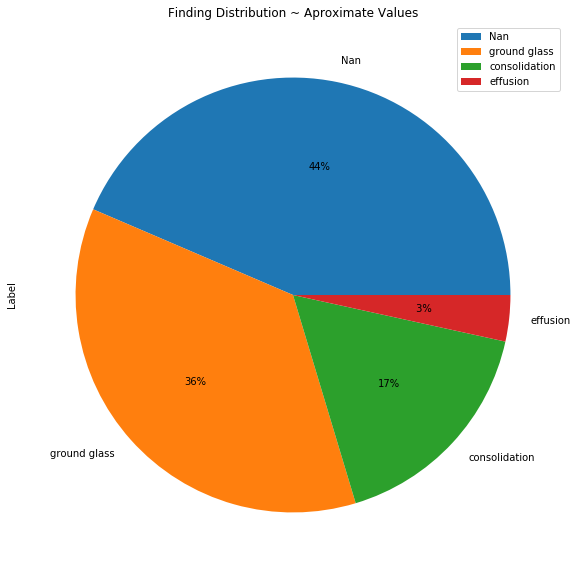

In [17]:
ax = ucsd['Label'].value_counts(dropna=False).plot.pie(y='Finding', legend = True, autopct='%2.0f%%', figsize = (10,10), title = 'Finding Distribution ~ Aproximate Values')

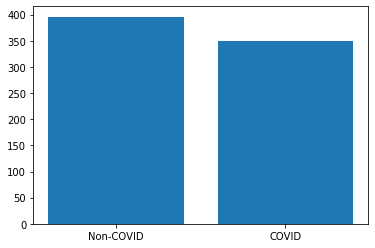

[396, 349]


In [20]:
COVID = 349 
NON_COVID = 396 # Looked at noncovid metadata on github 

label = ['Non-COVID','COVID']
val = [NON_COVID,COVID]
fig1 = plt.figure()
plt.xlabel = 'Result'
plt.ylabel = 'Number of Images with that Result'
plt.bar(label,val)
plt.show()
print(val)